In [1]:
import sys
sys.path.append('../')

from complementary_filter import Complementary_Filter
from kalman import KalmanFilter
from debugparser import DebugParser
import initials as init


In [18]:
dbgparser = DebugParser("/home/andreas/School-local/Kandidatarbete/autonomous_unicycle/sensor_data/run-5-p2.txt")
dbgparser.parse()

kalman = init.DEFAULT_KALMAN
complementary = Complementary_Filter(0.98, 0.02, 0.0)


kalman_angle = []
comp_filter_angle = []
reading_angle = []
embedded_filter_angle = []
t = []
time = 0
accelemeter_data = []
gyro_data = []
for i  in range(dbgparser.length):
    sensor_readings = dbgparser.get_current_readings(i)
    dt = dbgparser.get_dt(i)
    gyro = -sensor_readings["gx"]
    acc = sensor_readings["ay"]
    time += dt
    t.append(time)
    gyro_data.append(gyro)
    accelemeter_data.append(acc)
    kalman_angle.append(kalman.predict()[0])
    kalman.update(gyro)
    embedded_filter_angle.append(sensor_readings["theta"])
    comp_filter_angle.append(complementary(dt, gyro, acc))


NameError: name 't' is not defined

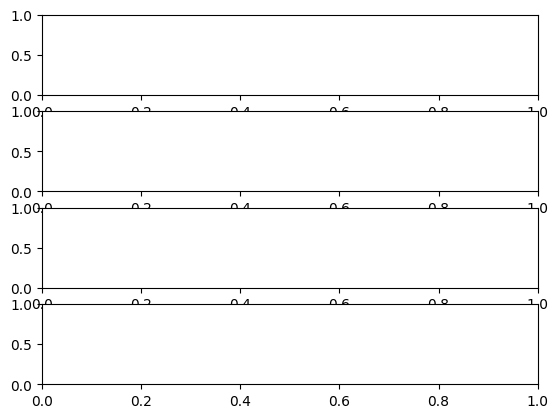

In [2]:
import matplotlib.pyplot as plt




fig, axs = plt.subplots(4, 1)
axs[0].plot(t, kalman_angle, t, embedded_filter_angle)
axs[1].plot(t, comp_filter_angle, t, embedded_filter_angle)
axs[2].plot(t, dbgparser.df["theta_d"], t, gyro_data)
axs[3].plot(t, accelemeter_data, t, gyro_data, t, dbgparser.df["ax"])
#axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Kalman and Complementary')
axs[0].grid(True)
#%matplotlib qt
#cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
#axs[1].set_ylabel('Coherence')

#fig.tight_layout()
plt.show()

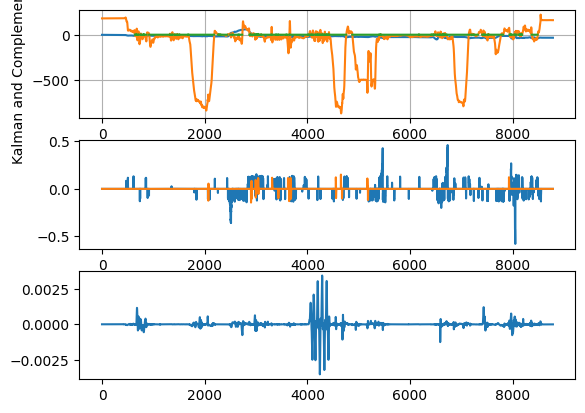

In [7]:
import matplotlib.pyplot as plt
import numpy as np 

p = DebugParser("/home/andreas/School-local/Kandidatarbete/autonomous_unicycle/sensor_data/20230503/run-all_axis-test-1.txt")
p.parse()

t = np.linspace(0,p.length, p.length)
df = p.df

fig, axs = plt.subplots(3, 1)
axs[0].plot(t, p.df["gx"], t, p.df["gy"], t, p.df["gz"])
axs[1].plot(t, p.df["ax"], t, p.df["ay"])
axs[2].plot(t, p.df["theta_roll_filter"])
#axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Kalman and Complementary')
axs[0].grid(True)
#%matplotlib qt
#cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
#axs[1].set_ylabel('Coherence')


In [29]:
min(p.df["gy"])

-864.76617

In [11]:
import matplotlib.pyplot as plt
import numpy as np 

p = DebugParser("/home/andreas/School-local/Kandidatarbete/autonomous_unicycle/sensor_data/20230503/run-all_axis-test-1.txt")
p.parse()

t = np.linspace(0,p.length, p.length)
df = p.df

fig, axs = plt.subplots(3, 1)
axs[0].plot(t, df["gx"], t, df["gy"], t, df["gz"])
axs[1].plot(t, df["ax"], t, df["ay"])
axs[2].plot(t, df["theta_roll_filter"])
#axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Kalman and Complementary')
axs[0].grid(True)
#%matplotlib qt
#cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
#axs[1].set_ylabel('Coherence')

In [2]:

def comp_filter(roll_angle, sensor_acc_roll, dt):
    acc_predicted_angle = -sensor_acc_roll / 9.82 * (3.14 / 2)
    gain = 10 * dt
    roll_angle = (1 - gain) * roll_angle + dt * sensor_acc_roll + gain * acc_predicted_angle
    return roll_angle

In [8]:
import matplotlib.pyplot as plt
import numpy as np 

p_modified_gyro_and_axis_measurement = DebugParser("/home/andreas/School-local/Kandidatarbete/autonomous_unicycle/sensor_data/20230505/run-01.txt")
p_modified_gyro_and_axis_measurement.parse()


t = np.linspace(0,p_modified_gyro_and_axis_measurement.length, p_modified_gyro_and_axis_measurement.length)
df = p_modified_gyro_and_axis_measurement.df

kalman = init.DEFAULT_KALMAN
complementary = Complementary_Filter(0.96, 0.04, 0.0)


kalman_angle = []
integration = []
comp_filter_angle = []
reading_angle = []
t = []
time = 0
accelemeter_data = []
gyro_data = []

angle = 0.0
for i  in range(p_modified_gyro_and_axis_measurement.length):
    sensor_readings = p_modified_gyro_and_axis_measurement.get_current_readings(i)
    dt = p_modified_gyro_and_axis_measurement.get_dt(i)
    gyro = sensor_readings["gy"]
    acc = sensor_readings["ax"]
    time += dt
    t.append(time)
    #kalman_angle.append(kalman.predict()[0])
    #kalman.update(gyro)
    comp_filter_angle.append(complementary(dt, gyro, acc))
    integration.append(comp_filter(angle, acc, dt))

fig, axs = plt.subplots(4, 1)
axs[0].plot(t, df["gx"], t, df["gy"], t, df["gz"])
axs[1].plot(t, df["ax"], t, df["ay"], t, df["az"])
axs[2].plot(t, df["theta_roll_comp"], t, comp_filter_angle, t, integration)
axs[3].plot(t, integration)
#axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Kalman and Complementary')
axs[0].grid(True)
#%matplotlib qt
#cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
#axs[1].set_ylabel('Coherence')

In [7]:
%matplotlib qt

In [18]:
import matplotlib.pyplot as plt
import numpy as np 

p_modified_gyro_and_axis_measurement = DebugParser("/home/andreas/School-local/Kandidatarbete/autonomous_unicycle/sensor_data/20230503/run-all_axis-test-9-raw.txt")
p_modified_gyro_and_axis_measurement.parse()


t = np.linspace(0,p_modified_gyro_and_axis_measurement.length, p_modified_gyro_and_axis_measurement.length)
df = p_modified_gyro_and_axis_measurement.df

fig, axs = plt.subplots(3, 1)
axs[0].plot(t, df["gx"], t, df["gy"], t, df["gz"])
axs[1].plot(t, df["ax"], t, df["ay"])
axs[2].plot(t, df["theta_roll_filter"])
#axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Kalman and Complementary')
axs[0].grid(True)
#%matplotlib qt
#cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
#axs[1].set_ylabel('Coherence')

In [20]:
import matplotlib.pyplot as plt
import numpy as np 

p_modified_gyro_and_axis_measurement = DebugParser("/home/andreas/School-local/Kandidatarbete/autonomous_unicycle/sensor_data/20230503/run-all_axis-test-8-raw.txt")
p_modified_gyro_and_axis_measurement.parse()


t = np.linspace(0,p_modified_gyro_and_axis_measurement.length, p_modified_gyro_and_axis_measurement.length)
df = p_modified_gyro_and_axis_measurement.df

fig, axs = plt.subplots(3, 1)
axs[0].plot(t, df["gx"], t, df["gy"], t, df["gz"])
axs[1].plot(t, df["ax"], t, df["ay"])
axs[2].plot(t, df["theta_roll_filter"])
#axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Kalman and Complementary')
axs[0].grid(True)
#%matplotlib qt
#cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
#axs[1].set_ylabel('Coherence')